# Grading
Total: 20.5/20
1. 4/4
2. 8/8
3. 4/4
4. 4/4

Bonus points (+0.5) for explanatory comments to the code.

In [1]:
from pylab import *

## Problem 1

In [2]:
# Initial data
M = 1000 # number of samples
N = 600 # number of time steps
T = 1
time = linspace(0,T,600)
dt = T/N
seed(2)

We compute 1000 samples of 600-step standard Brownian paths. The first column of the $1000 \times 600$ matrix generated must be identically zero.

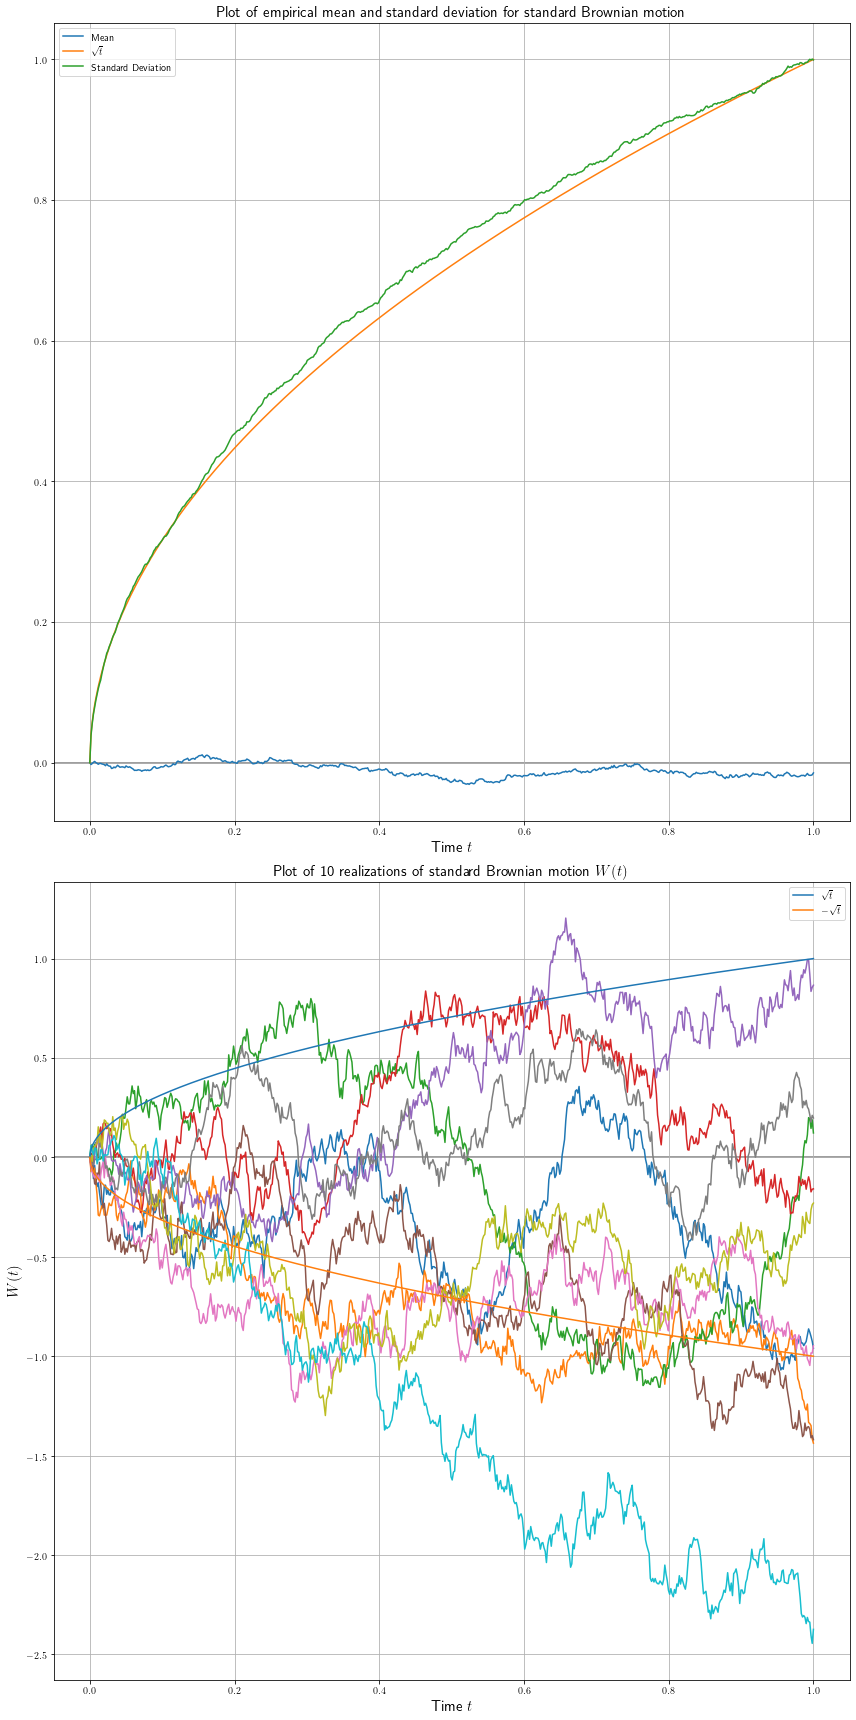

In [3]:
dW = normal(0,1,size=(M,N-1))*sqrt(dt)
W = cumsum(dW, axis=1)
W = c_[zeros(M),W]

fig = plt.figure(figsize=(12,24))
rc('text', usetex=True)

ax1 = fig.add_subplot(211)
ax1.plot(time, mean(W,axis=0), label='Mean')
ax1.plot(time, sqrt(time), label=r'$\sqrt{t}$')
ax1.plot(time, std(W, axis=0), label='Standard Deviation')

ax1.set_xlabel(r'Time $t$', fontsize=15)
ax1.axhline(color='gray', zorder=-1) # horizontal axis
ax1.set_title('Plot of empirical mean and standard deviation for standard Brownian motion', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(time, W[:10:,:].T)
ax2.plot(time, sqrt(time), label=r'$\sqrt{t}$')
ax2.plot(time, -sqrt(time), label=r'$-\sqrt{t}$')
ax2.set_xlabel(r'Time $t$', fontsize=15)
ax2.set_ylabel(r'$W(t)$', fontsize=15)
ax2.axhline(color='gray', zorder=-1) # horizontal axis
ax2.set_title(r'Plot of 10 realizations of standard Brownian motion $W(t)$', fontsize=15)
ax2.grid()
ax2.legend()

plt.tight_layout()

## Problem 2
### Part A: Ensemble of geometric Brownian paths

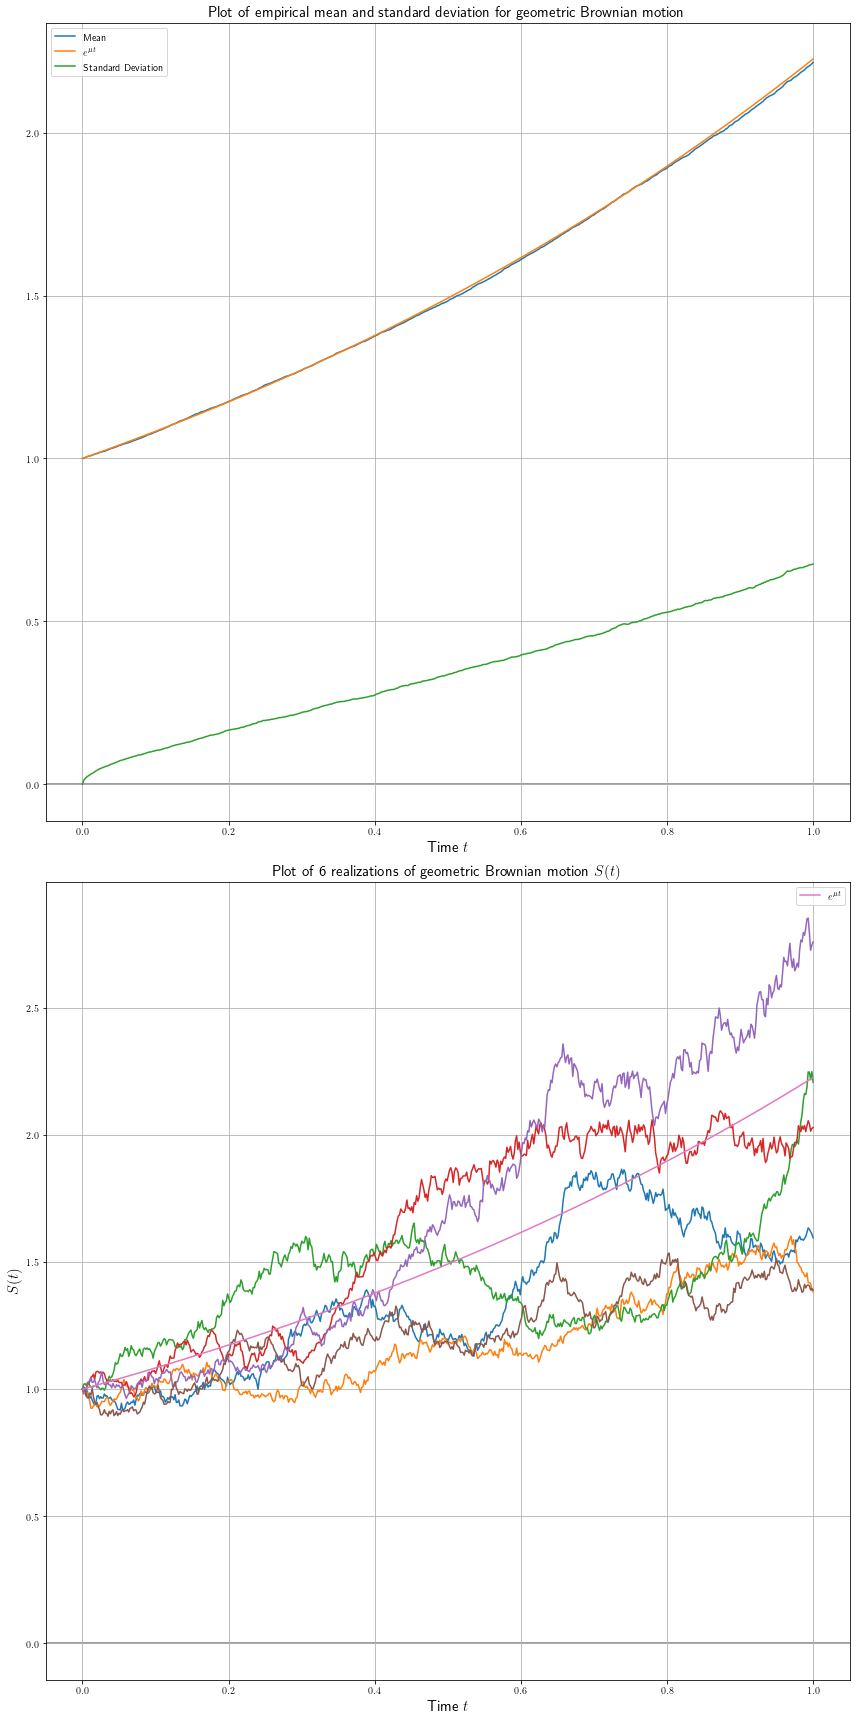

In [4]:
# Initial data
mu = 0.8
sigma = 0.3

I = tile(time, (M,1)) # M samples of time array
S = exp((mu - 0.5*sigma**2)*I + sigma*W) # using previously generated W

fig = plt.figure(figsize=(12,24))
rc('text', usetex=True)

ax1 = fig.add_subplot(211)
ax1.plot(time, mean(S,axis=0), label='Mean')
ax1.plot(time, exp(mu*time), label=r'$e^{\mu t}$')
ax1.plot(time, std(S, axis=0), label='Standard Deviation')

ax1.set_xlabel(r'Time $t$', fontsize=15)
ax1.axhline(color='gray', zorder=-1) # horizontal axis
ax1.set_title('Plot of empirical mean and standard deviation for geometric Brownian motion', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(time, S[:6:,:].T)
ax2.plot(time, exp(mu*time), label=r'$e^{\mu t}$')
ax2.set_xlabel(r'Time $t$', fontsize=15)
ax2.set_ylabel(r'$S(t)$', fontsize=15)
ax2.axhline(color='gray', zorder=-1) # horizontal axis
ax2.set_title(r'Plot of 6 realizations of geometric Brownian motion $S(t)$', fontsize=15)
ax2.grid()
ax2.legend()
plt.tight_layout()

### Part B: Binomial tree model

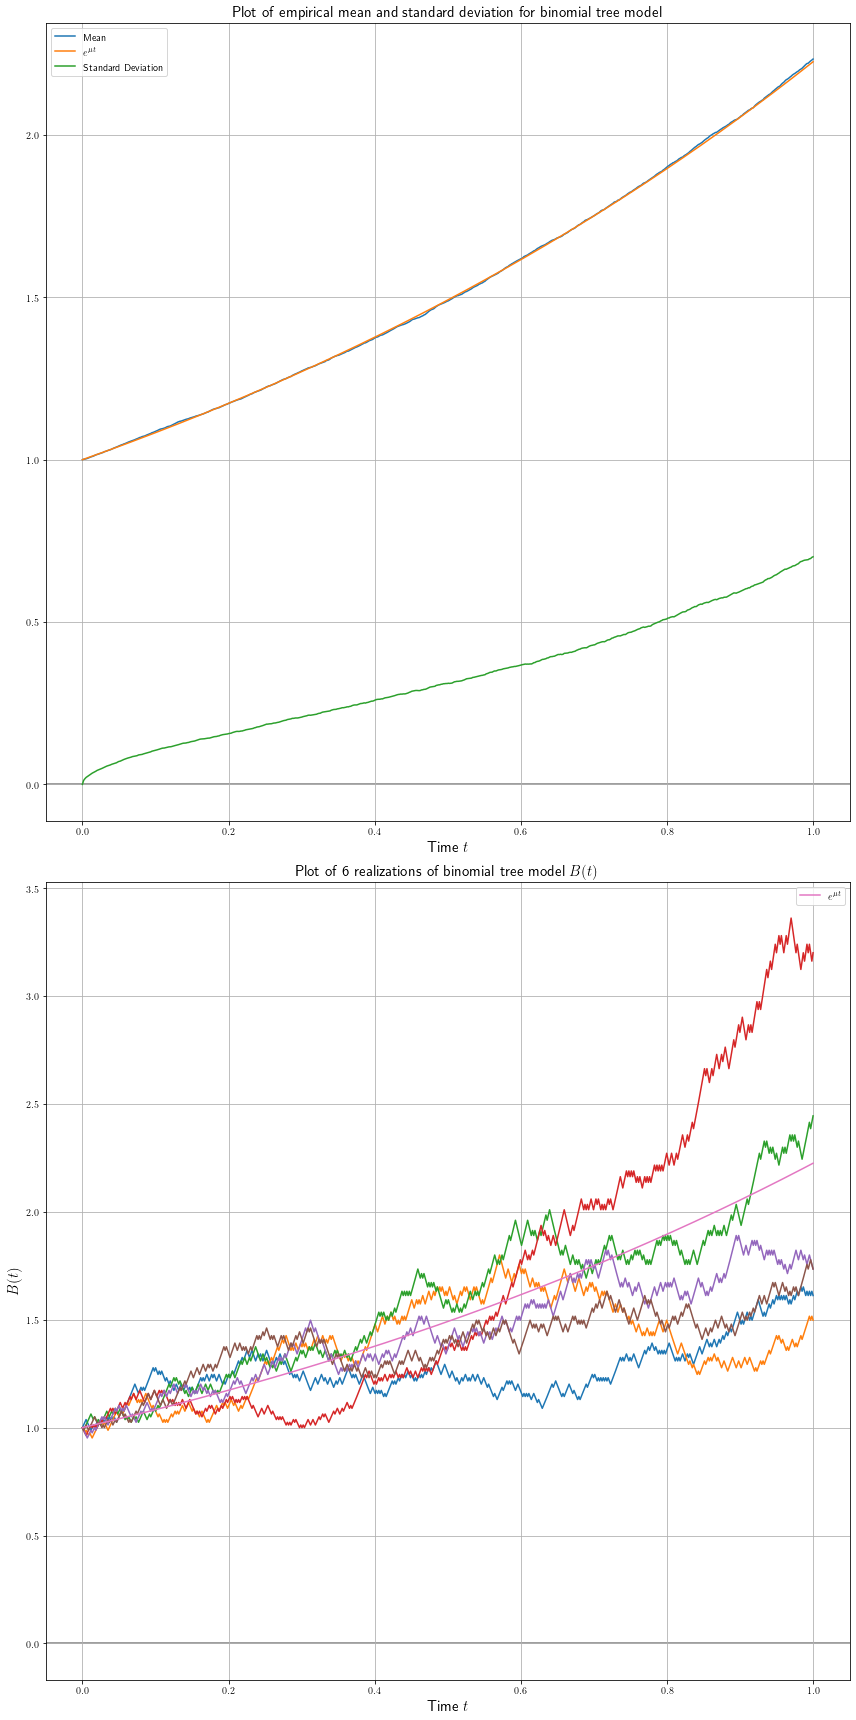

In [5]:
up = exp(sigma*sqrt(dt))
down = 1/up
p = (exp(mu*dt) - down)/(up - down)

E = random_sample(size=(M,N-1))
E[E > p] = down
E[E < p] = up
E = c_[ones(M),E]
B = cumprod(E, axis=1)

fig = plt.figure(figsize=(12,24))
rc('text', usetex=True)

ax1 = fig.add_subplot(211)
ax1.plot(time, mean(B,axis=0), label='Mean')
ax1.plot(time, exp(mu*time), label=r'$e^{\mu t}$')
ax1.plot(time, std(B, axis=0), label='Standard Deviation')

ax1.set_xlabel(r'Time $t$', fontsize=15)
ax1.axhline(color='gray', zorder=-1) # horizontal axis
ax1.set_title('Plot of empirical mean and standard deviation for binomial tree model', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(time, B[:6:,:].T)
ax2.plot(time, exp(mu*time), label=r'$e^{\mu t}$')
ax2.set_xlabel(r'Time $t$', fontsize=15)
ax2.set_ylabel(r'$B(t)$', fontsize=15)
ax2.axhline(color='gray', zorder=-1) # horizontal axis
ax2.set_title(r'Plot of 6 realizations of binomial tree model $B(t)$', fontsize=15)
ax2.grid()
ax2.legend()
plt.tight_layout()

### Part C: Results
We now compare the results from parts (a) and (b).

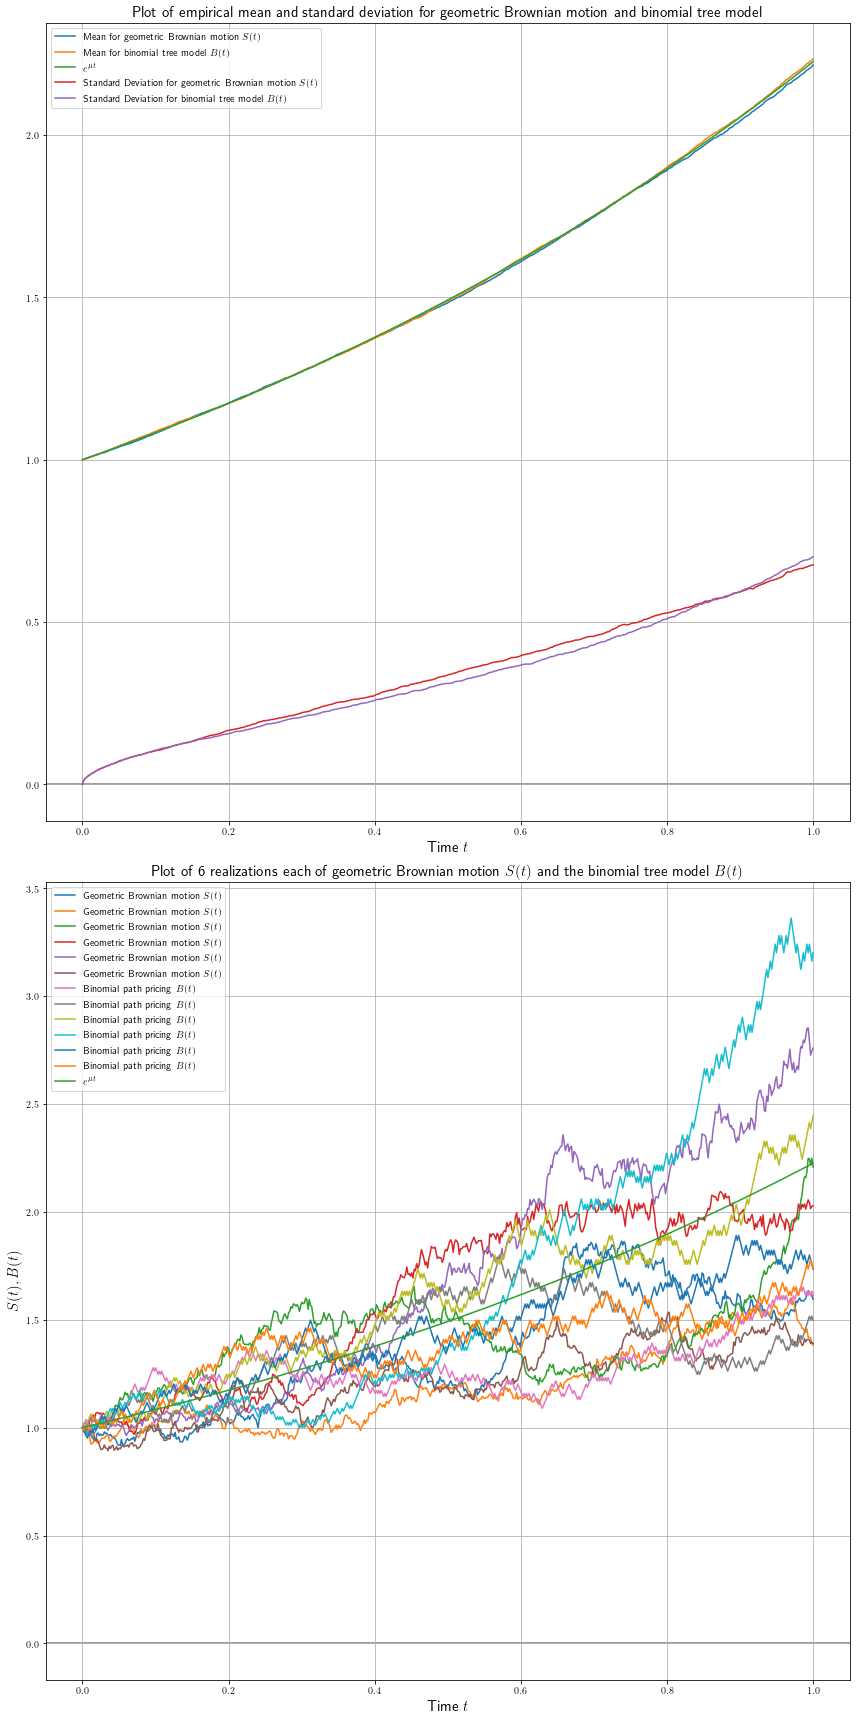

In [6]:
fig = plt.figure(figsize=(12,24))
rc('text', usetex=True)

ax1 = fig.add_subplot(211)
ax1.plot(time, mean(S,axis=0), label=r'Mean for geometric Brownian motion $S(t)$')
ax1.plot(time, mean(B,axis=0), label='Mean for binomial tree model $B(t)$')
ax1.plot(time, exp(mu*time), label=r'$e^{\mu t}$')
ax1.plot(time, std(S, axis=0), label='Standard Deviation for geometric Brownian motion $S(t)$')
ax1.plot(time, std(B, axis=0), label='Standard Deviation for binomial tree model $B(t)$')

ax1.set_xlabel(r'Time $t$', fontsize=15)
ax1.axhline(color='gray', zorder=-1) # horizontal axis
ax1.set_title('Plot of empirical mean and standard deviation for geometric Brownian motion and binomial tree model', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(time, S[:6:,:].T, label=r'Geometric Brownian motion $S(t)$')
ax2.plot(time, B[:6:,:].T, label=r'Binomial path pricing $B(t)$')
ax2.plot(time, exp(mu*time), label=r'$e^{\mu t}$')
ax2.set_xlabel(r'Time $t$', fontsize=15)
ax2.set_ylabel(r'$S(t), B(t)$', fontsize=15)
ax2.axhline(color='gray', zorder=-1) # horizontal axis
ax2.set_title(r'Plot of 6 realizations each of geometric Brownian motion $S(t)$ and the binomial tree model $B(t)$', fontsize=15)
ax2.grid()
ax2.legend()
plt.tight_layout()

The binomial tree samples have very nearly the same mean and variance (as functions of time) as the geometric Brownian motion ensemble. The binomial tree model seems to be an approximation of geometric Brownian motion.
## Problem 3

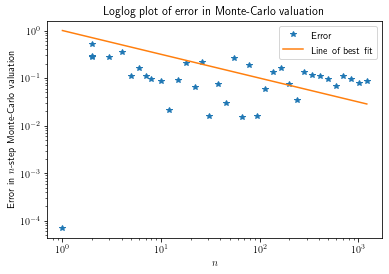

In [7]:
# Initial data
r = 0.2
sigma_MC = 0.8
S = 1
T = 1
K = 0.7
seed(4)


from scipy.stats import norm

def black_scholes(r, sigma, S, K, T):
    x = (log(S/K) + (r + 0.5*sigma**2)*T)/(sigma*sqrt(T))
    return S*norm.cdf(x) - K*exp(-r*T)*norm.cdf(x - sigma*sqrt(T))

def monte_carlo(r, n, sigma, S, K, T):
    S_mc = S*exp((r - 0.5*sigma**2)*T + sigma*sqrt(T)*normal(0,1,n))
    return exp(-r*T)*max(mean(S_mc)- K, 0)

option_price_limit = black_scholes(r, sigma_MC, S, K, T)

def error(n):
    return abs(monte_carlo(r, n, sigma_MC, S, K, T) - option_price_limit)

error_vec = vectorize(error)

x = array(1.2**arange(3,40),dtype=int)

figure()
rc('text', usetex=True)
title('Loglog plot of error in Monte-Carlo valuation')
xlabel(r'$n$')
ylabel(r'Error in $n$-step Monte-Carlo valuation')
loglog(x,error_vec(x),'*',label='Error')
loglog(x,1/x**0.5,label='Line of best fit') # fit a straight line, done by hand
legend()
show()

The graph above suggests the Monte-Carlo method has rate of convergence $1/2,$ or equivalently, $$\text{error}(n)\sim \frac{1}{\sqrt{n}}.$$
## Problem 4

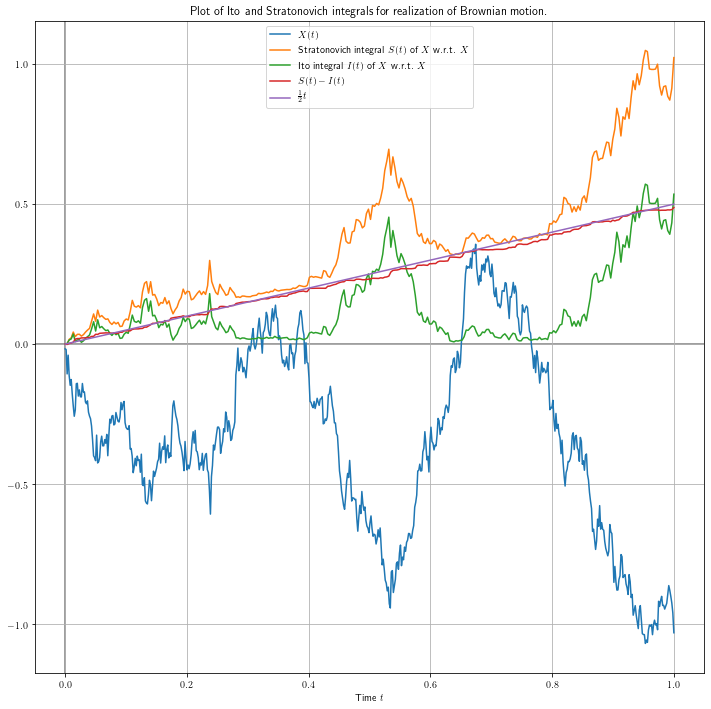

In [8]:
T = 1
N = 600
time = linspace(0,1,N)
seed(2)
dX = normal(0,1,N)*sqrt(T/N)
X = cumsum(dX)
n = len(X)/2

Ito = X[::2]*(dX[:N-1:2] + dX[1:N:2])
Strat = X[1::2]*(dX[:N-1:2] + dX[1:N:2])
xx = linspace(0,1,len(Ito))

fig = plt.figure(figsize=(12,12))
rc('text', usetex=True)

plot(time, X, label=r'$X(t)$')
plot(xx, cumsum(Strat), label=r'Stratonovich integral $S(t)$ of $X$ w.r.t. $X$')
plot(xx, cumsum(Ito), label=r'Ito integral $I(t)$ of $X$ w.r.t. $X$')
plot(xx, cumsum(Strat) - cumsum(Ito), label=r'$S(t) - I(t)$')
plot(xx, 0.5*xx, label=r'$\frac{1}{2}t$')
axhline(color='gray', zorder=-1)
axvline(color='gray', zorder=-1)
xlabel(r'Time $t$')
title('Plot of Ito and Stratonovich integrals for realization of Brownian motion.')
grid()
legend()
show()

From the graph we see that the difference $S(t) - I(t)$ is approximately $\frac{1}{2}t.$